# Categorical data
discrete - only certain values - categories or classes
* stats are not useful (mean, max, avg, stdev)
* tabulate data and count frequencies and percentages
* must be numerically encoded for ML models
* types
    * ordinal - categorical with inherent order (month of year, star rating)
        * differences are not meaningful
    * nominal - no inherent rank/order - just names
        * classifications - cannot be ordered
        * encodings
            * label encoding - numeric ID for each value - single column
                * numbers can be generated randomly
                * better to use for ordinal only
            * one-hot encoding - separate column for each value with 1 or 0 (single 1 per row)
                * most popular
                * as many new columns as categories - can become large
                * avoids illusion of sortability

In [1]:
import pandas as pd

In [2]:
gosales = pd.read_csv('datasets/GoSales_Tx_LogisticRegression.csv')
gosales.sample(10) #predict whether customer purchases a tent ('is_tent')

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
36912,False,F,59,Married,Other
15572,False,F,57,Married,Retired
15013,True,M,34,Unspecified,Professional
57241,False,M,33,Married,Other
53020,False,F,39,Single,Professional
49664,False,F,25,Single,Other
49727,False,F,19,Single,Other
31047,False,M,34,Married,Other
37978,False,M,23,Single,Professional
6943,False,M,42,Married,Other


In [3]:
gosales.shape

(60252, 5)

In [4]:
gosales.describe()

,AGE
count,60252.000000
mean,34.187479
std,10.105477
min,17.000000
25%,26.000000
50%,33.000000
75%,41.000000
max,69.000000


In [5]:
import matplotlib.pyplot as plt


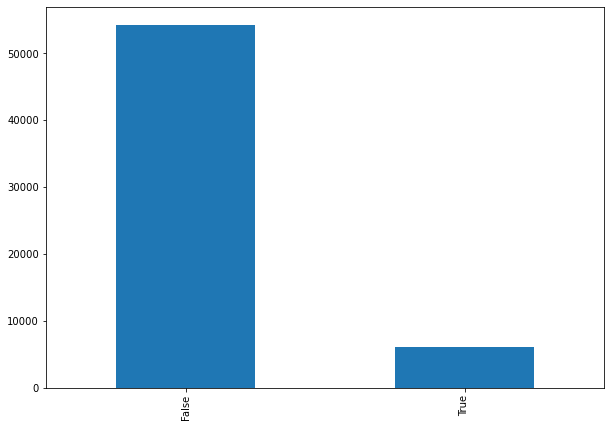

In [6]:
plt.figure(figsize=(10,7))
pd.value_counts(gosales['IS_TENT']).plot.bar()
plt.show()

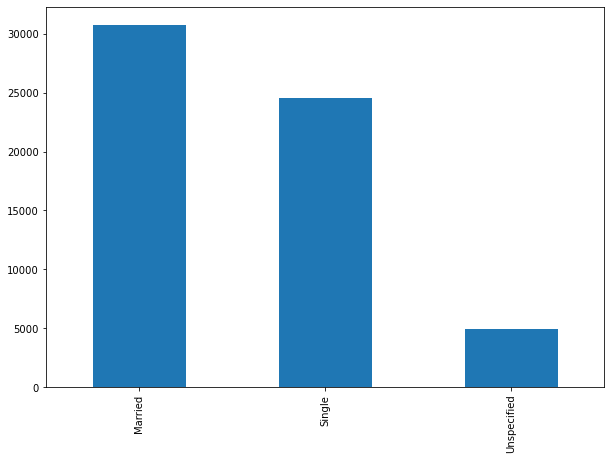

In [7]:
plt.figure(figsize=(10,7))
pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()
plt.show()

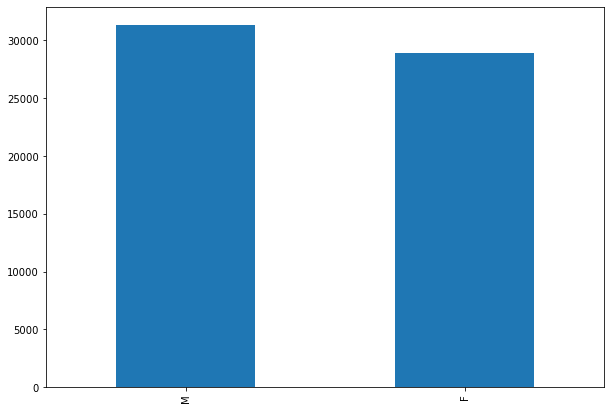

In [8]:
plt.figure(figsize=(10,7))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()

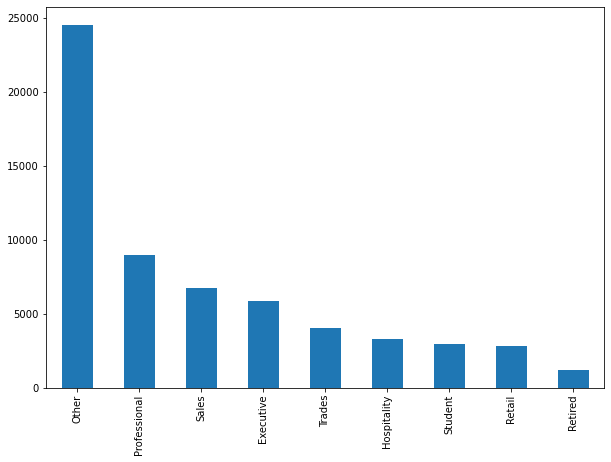

In [9]:
plt.figure(figsize=(10,7))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()

In [10]:
gender = ['M', 'F']

In [11]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
label_endcoding = label_encoding.fit(gender)

In [12]:
gosales['GENDER'] = label_encoding.transform(gosales['GENDER'].astype(str))

In [13]:
label_encoding.classes_# F is 0 and M is 1

array(['F', 'M'], dtype='<U1')

In [14]:
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
56413,False,1,27,Single,Other
54662,False,0,25,Single,Other
25802,False,0,38,Married,Executive
5096,False,1,29,Unspecified,Sales
17469,False,0,33,Married,Other
2153,False,0,46,Married,Other
24519,False,1,31,Married,Other
10824,False,0,36,Married,Other
58209,False,1,29,Married,Sales
979,False,1,40,Married,Executive


In [15]:
gosales[['MARITAL_STATUS']].sample(5)

,MARITAL_STATUS
51950,Single
35727,Married
53665,Married
19602,Married
21247,Married


In [16]:
one_hot_encoding = preprocessing.OneHotEncoder()
one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1,1))

In [17]:
one_hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [19]:
one_hot_labels = one_hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1,1)).toarray()
one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [20]:
labels_df = pd.DataFrame()
labels_df['MARITAL_STATUS_Married'] = one_hot_labels[:,0]
labels_df['MARITAL_STATUS_Single'] = one_hot_labels[:,1]
labels_df['MARITAL_STATUS_Unspecified'] = one_hot_labels[:,2]
labels_df.head(10)

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [21]:
encoded_df = pd.concat([gosales, labels_df], axis=1)
encoded_df.drop('MARITAL_STATUS', axis=1, inplace=True)

In [22]:
encoded_df.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
363,False,1,24,Retail,0.0,1.0,0.0
10097,False,0,42,Other,1.0,0.0,0.0
21362,False,1,19,Student,0.0,1.0,0.0
57838,False,1,34,Sales,1.0,0.0,0.0
48751,False,1,43,Sales,0.0,1.0,0.0
41018,False,0,20,Other,0.0,1.0,0.0
52264,False,0,42,Executive,1.0,0.0,0.0
2902,False,1,26,Other,0.0,1.0,0.0
42979,False,0,28,Professional,0.0,1.0,0.0
2746,False,0,37,Other,1.0,0.0,0.0


In [23]:
#easier
gosales = pd.get_dummies(encoded_df, columns=['PROFESSION'])
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
50352,False,1,38,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
27512,True,1,34,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
4953,False,1,43,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1
50948,False,1,38,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
44619,False,0,43,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
7966,True,1,33,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1
36261,False,1,38,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1
40389,False,1,18,0.0,1.0,0.0,0,0,0,0,0,0,0,1,0
34453,False,1,26,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
35747,False,0,35,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0


In [24]:
#reread
gosales = pd.read_csv('datasets/GoSales_Tx_LogisticRegression.csv')
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
32124,True,M,27,Single,Professional
16089,True,M,21,Single,Executive
34450,False,M,56,Married,Other
41486,False,F,29,Single,Sales
55721,False,F,27,Single,Sales
21100,True,M,22,Single,Trades
650,False,F,39,Unspecified,Other
26881,False,M,39,Married,Sales
3610,False,M,22,Single,Student
9700,False,F,28,Married,Retail


In [25]:
gosales = pd.get_dummies(gosales)#one-hot encode all categorical columns at once
gosales.sample(10)

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
15070,False,28,0,1,0,1,0,0,0,1,0,0,0,0,0,0
24805,False,29,0,1,1,0,0,0,0,1,0,0,0,0,0,0
43565,False,20,0,1,0,1,0,0,0,0,1,0,0,0,0,0
47248,False,19,0,1,0,1,0,0,0,1,0,0,0,0,0,0
9975,False,31,0,1,1,0,0,0,0,0,1,0,0,0,0,0
53967,False,42,0,1,1,0,0,0,0,0,0,0,0,1,0,0
38135,False,20,1,0,0,1,0,0,0,0,1,0,0,0,0,0
30461,False,39,0,1,0,1,0,0,0,0,1,0,0,0,0,0
41505,False,32,1,0,1,0,0,1,0,0,0,0,0,0,0,0
23019,False,19,1,0,0,1,0,0,0,0,0,1,0,0,0,0


In [26]:
#convert continuous value to discrete - discretization (bucketization)
import pandas as pd
import numpy as np
X = np.array([-7, 2,-3, -11, 14,6,8])

In [33]:
categories = pd.cut(X,4)
categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [28]:
categories.categories#closed right interval

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [29]:
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [30]:
categories.ordered

True

In [32]:
pd.cut(X,4, retbins=True)#add a returned array with bin edges

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

In [34]:
marks = np.array([70,20, 30,99,40,16,80])

In [36]:
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])

In [37]:
categories

[good, poor, poor, excellent, average, poor, excellent]
Categories (4, object): [poor < average < good < excellent]

In [38]:
from sklearn.preprocessing import KBinsDiscretizer

In [45]:
marks = [[x] for x in [70,20, 30,99,40,16,80]]#change to 2D list

In [47]:
marks =[[70], [20], [30], [99], [40], [16], [80]] #same

In [49]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')#encode as integers - uniform = bins have same widths


In [50]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [51]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [53]:
enc.bin_edges_#confirm interval range for each bin is identical (20.75)

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

In [54]:
X = [[-21,41,-14],
    [-13, 23,-31],
    [9,30,-5],
    [0,24,-17]]

In [56]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')#quantile = same number of points in each bin

In [57]:
enc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=4)

In [58]:
X_trans = enc.transform(X)
X_trans#buckets are different for each column

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [59]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

In [60]:
enc.inverse_transform(X_trans)#tries to recreate the original points 
#assumes the data point is the mean of each bins edges

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

In [61]:
automobile_df = pd.read_csv('datasets/auto_mpg_processed.csv')
automobile_df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


In [62]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

In [63]:
X.sample(10)

,Horsepower
47,70
250,85
107,145
173,86
148,145
380,84
116,180
199,150
219,98
286,80


In [64]:
import matplotlib.pyplot as plt

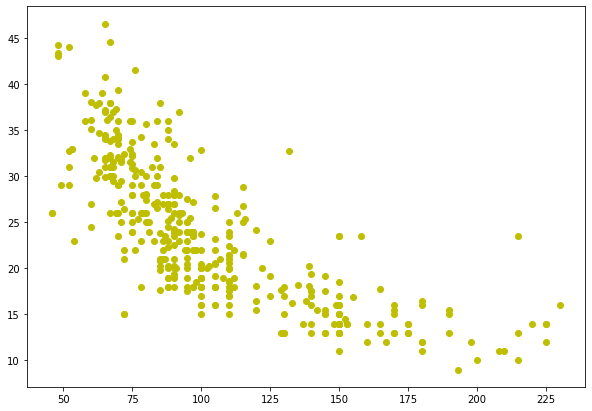

In [65]:
plt.figure(figsize=(10,7))
plt.plot(X,Y,'o',c='y')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

In [68]:
reg = LinearRegression().fit(x_train, y_train)

In [69]:
y_pred = reg.predict(x_test)
y_pred

array([30.32646823, 28.62368737, 26.45651173, 23.36054653, 26.30171347,
       22.58655523, 29.24288041, 25.37292391, 29.55247693, 23.36054653,
       32.02924909, 28.77848563, 29.08808215, 27.84969607, 22.58655523,
       30.01687171, 28.46888911, 32.49364387, 27.23050303, 16.39462483,
       25.99211695, 16.39462483, 22.58655523, 17.94260743, 15.62063353,
       22.58655523, 13.29865963, 25.37292391, 24.59893261, 18.09740569,
        4.01076403, 26.30171347, 29.24288041, 28.77848563, 25.37292391,
       28.00449433, 24.13453783, 22.58655523, 24.13453783, 26.45651173,
       24.13453783, 27.38530129, 27.54009955, 28.00449433, 28.77848563,
       18.09740569, 26.45651173, 26.45651173, 10.20269443, 29.55247693,
       24.59893261, 29.55247693, 25.68252043, 31.41005605, 27.38530129,
       29.86207345, 24.90852913, 25.99211695, 29.24288041, 28.93328389,
       15.93023005, 22.58655523, 29.08808215, 22.27695871, 28.00449433,
       30.32646823, 24.90852913, 29.08808215,  4.78475533, 25.68

In [70]:
from sklearn.metrics import r2_score
print('r_2 score: ', r2_score(y_test,y_pred))

r_2 score:  0.5838925168286613


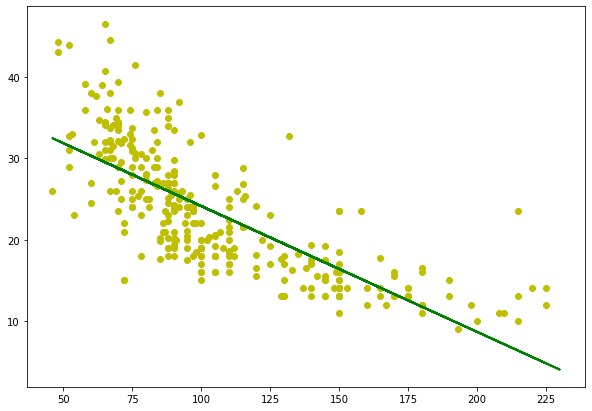

In [71]:
plt.figure(figsize=(10,7))
plt.plot(x_train,y_train,'o',c='y')
plt.plot(x_test, y_pred, linewidth=2, color='green', linestyle='-',label='linear regression')
plt.show()

In [73]:
enc = KBinsDiscretizer(n_bins=20, encode='ordinal')
x_binned = enc.fit_transform(x_train)#small differens in HP don't matter - only large ones

In [74]:
x_bineed[:10]

array([[ 2.],
       [10.],
       [10.],
       [10.],
       [ 5.],
       [ 5.],
       [ 4.],
       [15.],
       [15.],
       [12.]])

In [76]:
x_test_binned = enc.transform(x_test) # need to perform the same transformation on test

In [77]:
reg = LinearRegression().fit(x_bineed,y_train)

In [78]:
y_pred = reg.predict(x_test_binned)
y_pred

array([33.91282818, 30.6195249 , 27.32622161, 20.73961505, 27.32622161,
       19.64184729, 31.71729266, 24.03291833, 32.81506042, 20.73961505,
       33.91282818, 30.6195249 , 31.71729266, 29.52175714, 19.64184729,
       33.91282818, 30.6195249 , 33.91282818, 28.42398938, 15.25077624,
       25.13068609, 15.25077624, 19.64184729, 17.44631177, 15.25077624,
       19.64184729, 14.15300848, 24.03291833, 22.93515057, 17.44631177,
       13.05524072, 27.32622161, 31.71729266, 30.6195249 , 24.03291833,
       29.52175714, 20.73961505, 19.64184729, 20.73961505, 27.32622161,
       20.73961505, 28.42398938, 28.42398938, 29.52175714, 30.6195249 ,
       17.44631177, 27.32622161, 27.32622161, 13.05524072, 32.81506042,
       22.93515057, 32.81506042, 24.03291833, 33.91282818, 28.42398938,
       32.81506042, 22.93515057, 25.13068609, 31.71729266, 31.71729266,
       15.25077624, 19.64184729, 31.71729266, 19.64184729, 29.52175714,
       33.91282818, 22.93515057, 31.71729266, 13.05524072, 24.03

In [79]:
r2_score(y_test, y_pred) #descritizing improved the predictive power of the model

0.7326111508735408

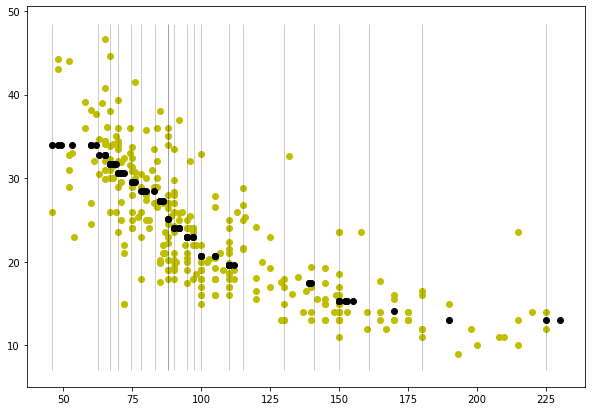

In [83]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c='y')
plt.scatter(x_test,y_pred,c='k')
plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)#gca = get current axes
plt.show()

In [84]:
help(plt.gca)

Help on function gca in module matplotlib.pyplot:

gca(**kwargs)
    Get the current :class:`~matplotlib.axes.Axes` instance on the
    current figure matching the given keyword args, or create one.
    
    Examples
    --------
    To get the current polar axes on the current figure::
    
        plt.gca(projection='polar')
    
    If the current axes doesn't exist, or isn't a polar one, the appropriate
    axes will be created and then returned.
    
    See Also
    --------
    matplotlib.figure.Figure.gca : The figure's gca method.



(0.0, 1.0)

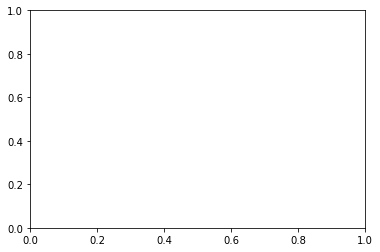

In [87]:
(plt.gca().get_ylim())